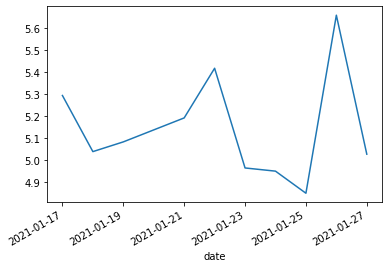

In [124]:
import os
import json
import pandas as pd

files = list(os.walk("../scrapy_projects/etoro/etoro/"))[0][2]
etoro_portfolios_paths = [f for f in files if f.startswith("investor_dashboard")]
etoro_investor_paths = [f for f in files if f.startswith("investor_portfolio")]


etoro_investors = []
for path in etoro_investor_paths:
    with open(f"../scrapy_projects/etoro/etoro/{path}","r") as f:
        _ = json.load(f)
        etoro_investors.extend(_)
        
        
panda_investors = []
for investor in etoro_investors:
    for item in investor["items"]:
        row = {"investor_name":investor["investor_name"],
                    "date":investor["datetime"],
                    "company":item["company_ticker"],
                    "type":item["type"],
                    "invested":item["invested"].replace("<","").replace("%","")}
        panda_investors.append(row)
        
df = pd.DataFrame(panda_investors)
df = df.astype({'invested': 'float32'})
df["date"] = pd.to_datetime(df["date"],format='%y-%m-%d')
df[df.company=='TSLA'].groupby('date')['invested'].mean().plot()